#TTCD without Transformer: TKE Dataset (Ablation Study)


Here we implemented a simple convolution block and de-stationary factor block to learn non-stationary features and then the Causal Structure learner module is applied to learned features. The convolution and de-stationary factor blocks together work as Non-Staionary Feature Learner module.

In this notebook, we applied the ablation model to the real world TKE dataset to generate a causal graph. The codes to visualize the predicted causal graph are available after the model training codes. The predicted graph is compared with ground truth using an adjacency matrix (array).  

##Read Dataset

In [ ]:
import numpy as np
import pandas as pd


df_2D_data_TKE = pd.read_csv('/content/TKE_data.csv')
df_2D_data_TKE_nz = df_2D_data_TKE.iloc[300:]
df_2D_data_TKE_NZ = df_2D_data_TKE_nz[[ "CSP_TKE_SH", "CSP_TKE_BU", "CSP_TKE_TEND", "CSP_TKE"]]
df_2D_data_TKE_NZ.to_csv('TKE_data_NZ.csv', index=False)

In [ ]:
true_full_graph = np.zeros((4,24))
true_full_graph[0,0]=1
true_full_graph[0,12]=1

true_full_graph[1,16]=1
true_full_graph[1,20]=1

true_full_graph[2,16]=1

true_full_graph[3,16]=1
true_full_graph[3,18]=1
true_full_graph[3,19]=1
true_full_graph[3,22]=1
true_full_graph


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 1., 0., 0., 1., 0.]])

In [ ]:
!pip install cdt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 20.8 MB/s eta 0:00:00
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=daeb49ad3dd33409241f1b500e635dae33f49b6f84828340632ec839f9a4e3c1
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=ff1e38ea2708bf53e60fe1e2bbf1374f12a45f73130e0ce78a89b3bd12f4e495
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built GPUtil skrebate


In [ ]:
import cdt

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


##Data Pre-processing

In [ ]:
syn_data_np = data.to_numpy()

In [ ]:
syn_data_np_T= syn_data_np.T

In [ ]:
syn_data_pro = np.zeros((syn_data_np.shape[0]-5,4,6))
for i in range(0, (syn_data_np.shape[0]-5)):
  syn_data_pro[i,:,:]= syn_data_np_T[0:4, i:i+6]


In [ ]:
syn_data_pro[0,:,:], syn_data_np_T[0:4,0:6]

(array([[-8.5269915e-07, -1.3296220e-06, -1.9291240e-06, -2.2029717e-06,
         -1.9521467e-06, -1.3877342e-06],
        [-1.6996312e-06, -1.8513449e-08,  1.3548080e-06,  1.3195555e-06,
         -2.0880002e-07, -2.2710205e-06],
        [-3.4050295e-06, -2.6777575e-06, -2.5034400e-06, -3.0863880e-06,
         -4.1130934e-06, -5.0464890e-06],
        [ 1.7818590e-03,  1.7548563e-03,  1.7369833e-03,  1.7509138e-03,
          1.8140912e-03,  1.9286955e-03]]),
 array([[-8.5269915e-07, -1.3296220e-06, -1.9291240e-06, -2.2029717e-06,
         -1.9521467e-06, -1.3877342e-06],
        [-1.6996312e-06, -1.8513449e-08,  1.3548080e-06,  1.3195555e-06,
         -2.0880002e-07, -2.2710205e-06],
        [-3.4050295e-06, -2.6777575e-06, -2.5034400e-06, -3.0863880e-06,
         -4.1130934e-06, -5.0464890e-06],
        [ 1.7818590e-03,  1.7548563e-03,  1.7369833e-03,  1.7509138e-03,
          1.8140912e-03,  1.9286955e-03]]))

In [ ]:
syn_data_2d = np.expand_dims(syn_data_pro, axis =-1)
syn_data_2d.shape

(476, 4, 6, 1)

In [ ]:
syn_data_2d_tf = syn_data_2d.transpose(0, 3, 1, 2) #for pytorch
syn_data_2d_tf.shape

(476, 1, 4, 6)

In [ ]:
syn_data_np_4 = syn_data_np[:,0:4]
syn_data_np_4.shape

(481, 4)

In [ ]:
syn_data_4_df =pd.DataFrame(data = syn_data_np_4,
                  columns = ['S1', 'S2', 'S3', 'S4'])

In [ ]:
syn_data_4_df.iloc[:5,:]

,S1,S2,S3,S4
0,0.589080,0.537633,0.577397,0.465521
1,0.417201,0.524181,0.620463,0.549677
2,0.440339,0.372351,0.364587,0.476328
3,0.406922,0.355259,0.458018,0.441679
4,0.419101,0.375814,0.423328,0.428151


##TTCD Model with out Transformer

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time
from torchsummary import summary

# Set random seed for reproducibility
torch.manual_seed(1001)

# Custom Causal Conv2D Layer
class CausalConv2D(nn.Module):
    def __init__(self, in_channels, out_channels, counter, kernel_size=(1, 1), padding='valid', activation="tanh"):
        super(CausalConv2D, self).__init__()
        self.conv2d = nn.Conv2d(in_channels, out_channels, kernel_size, padding=0 if padding == 'valid' else 1)
        self.counter = counter
        self.mask = None
        self.activation = nn.Tanh() if activation == "tanh" else nn.ReLU()

    def forward(self, x):
        if self.mask is None:
            self.mask = torch.ones_like(self.conv2d.weight)
            self.mask[0,0,self.counter, -1] = 0.0
        self.conv2d.weight.data.mul_(self.mask)
        return self.activation(self.conv2d(x))

In [ ]:
class DSFactors(nn.Module):
    '''
    MLP to learn the De-stationary factors
    '''
    def __init__(self, enc_in, seq_len, hidden_dims, hidden_layers, output_dim, kernel_size=1):
        super(DSFactors, self).__init__()

        padding = 1 if torch.__version__ >= '1.5.0' else 2
        self.series_conv = nn.Conv1d(in_channels=seq_len, out_channels=1, kernel_size=kernel_size, bias=False)

        layers = [nn.Linear(2 * enc_in, hidden_dims[0]), nn.ReLU()]
        for i in range(hidden_layers-1):
            layers += [nn.Linear(hidden_dims[i], hidden_dims[i+1]), nn.ReLU()]

        layers += [nn.Linear(hidden_dims[-1], output_dim, bias=False)]
        self.backbone = nn.Sequential(*layers)

    def forward(self, x, stats):
        # x:     B x S x E
        # stats: B x 1 x E
        # y:     B x O
        batch_size = x.shape[0]
        x = self.series_conv(x)          # B x 1 x E
        x = torch.cat([x, stats], dim=1) # B x 2 x E
        x = x.view(batch_size, -1) # B x 2E
        y = self.backbone(x)       # B x O

        return y

In [ ]:
# 2D Model Definition
class CausalModel2D(nn.Module):
    def __init__(self, input_dims):
        super(CausalModel2D, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=input_dims[0], out_channels=4, kernel_size=1)
        self.activation = nn.Tanh() #nn.ReLU()
        self.pooled_outputs = nn.ModuleList([CausalConv2D(1, 1, i, kernel_size=(4, 6), activation="tanh") for i in range(4)])
        self.tau_learner   = DSFactors(enc_in=4, seq_len=6, hidden_dims=[16, 16], hidden_layers=2, output_dim=1)
        self.delta_learner = DSFactors(enc_in=4, seq_len=6, hidden_dims=[16, 16], hidden_layers=2, output_dim=6)



    def forward(self, x):
        x_raw = x.clone().detach()

        # Normalization
        mean_x = x.mean(3, keepdim=True).detach() # B x 1 x E x 1
        print("X mean size: ",mean_x.size())
        x = x - mean_x
        std_x = torch.sqrt(torch.var(x, dim=3, keepdim=True, unbiased=False) + 1e-5).detach() # B x 1 x E x 1
        print("X std size: ",std_x.size())
        x = x / std_x

        y = x.clone().detach()
        y = y[:,0,:,5].view(y.size(0), -1)
        print("Y std size: ", y.size())

        tau = self.tau_learner(x_raw.squeeze(1).permute(0, 2, 1), std_x.squeeze(3)).exp()     # B x S x E, B x 1 x E -> B x 1, positive scalar
        delta = self.delta_learner(x_raw.squeeze(1).permute(0, 2, 1), mean_x.squeeze(3))      # B x S x E, B x 1 x E -> B x S

        tau = tau.unsqueeze(1).unsqueeze(1)  # B x 1 x 1 x 1
        delta = delta.unsqueeze(1).unsqueeze(1)  # B x 1 x 1 x S

        x = self.conv1(x)
        x = self.activation(x) #1st
        x = torch.mean(x, dim=1, keepdim=True)
        #x = self.reshape(x)

        x = x * tau + delta

        pooled_outputs = [layer(x) for layer in self.pooled_outputs]
        x = torch.cat(pooled_outputs, dim=1)
        x = x.view(x.size(0), -1)

        return x, y


In [ ]:
# Overall CausalNN Model Definition
class TTDCModel(nn.Module):
    def __init__(self, dims, alpha=1.0, rho=1.0, rho_max=10e20, h_tol=1e-8):
        super(TTDCModel, self).__init__()
        self.dims = dims
        self.alpha = alpha
        self.rho = rho
        self.h_p = float('inf')
        self.rho_max = rho_max
        self.h_tol = h_tol
        self.model_2d = CausalModel2D(self.dims)

    def forward(self, x):
        return self.model_2d(x)

    def custom_loss_function(self, y_true, y_pred):
        mse = nn.MSELoss()(y_pred, y_true)
        h_val = self.causal_loss_h()
        h_loss = 0.5 * self.rho * h_val * h_val + self.alpha * h_val
        lambda1 = 0.9
        adj_mat = self.get_mat()
        sparse_loss = lambda1 * np.sum(np.absolute(adj_mat))
        print(f'MSE Loss is: {mse}, h Loss is: {h_loss}, L1 loss: {sparse_loss}, Total Loss is: {mse + h_loss + sparse_loss}')
        return mse + h_loss + sparse_loss

    def causal_loss_h(self):
        mat = self.get_mat()
        h_val = self.h_acy(mat[:, 20:])
        return h_val

    def get_mat(self):
        # Assuming `self.model_2d` has 4 causal conv layers
        conv_layers = [layer for layer in self.model_2d.pooled_outputs]
        weights = [layer.conv2d.weight.data.cpu().numpy().flatten('F') for layer in conv_layers]
        mat_2d_s = np.stack(weights)
        return mat_2d_s

    def h_acy(self, A):
        n_var = A.shape[0]
        #x_np = torch.from_numpy(np_array)
        AT = torch.tensor(A, dtype=torch.float32)
        h = torch.trace(torch.linalg.matrix_exp(AT * AT)) - n_var
        return h

    def compile(self, optimizer='adam'):
        self.optimizer = optim.Adam(self.parameters(), lr=1e-2) if optimizer == 'adam' else optim.SGD(self.parameters(), lr=1e-2)

    def fit(self, x, y, maxiter=100, batch_size=512, save_dir='./results/temp'):
        start_time = time.time()

        # Logging
        log_file = open(f"{save_dir}/causalnn_log.csv", 'w')
        log_file.write('iter,loss\n')

        train_loader = torch.utils.data.DataLoader(list(zip(x, y)), batch_size=batch_size, shuffle=False)

        for epoch in range(maxiter):
            print(f'Epoch: {epoch}')
            #h_n = None
            for i, (x_batch, y_batch) in enumerate(train_loader):
                x_batch = torch.tensor(x_batch, dtype=torch.float32)
                y_batch = torch.tensor(y_batch, dtype=torch.float32)


                self.optimizer.zero_grad()
                output, y = self.forward(x_batch)
                #loss = self.custom_loss_function(y_batch, output)
                loss = self.custom_loss_function(y, output)
                loss.backward()
                self.optimizer.step()


        log_file.close()
        torch.save(self.state_dict(), f"{save_dir}/TTDC_Model_final_{round(time.time())}.pt")

        x_all = torch.tensor(x, dtype=torch.float32)
        y_pred, _ = self.forward(x_all)
        y_pred = y_pred.detach().cpu().numpy()
        adj_mat = self.get_mat()

        return y_pred, adj_mat




##Training the Ablation Model

In [ ]:
syn_data_np.shape, syn_data_2d_tf.shape

((481, 4), (476, 1, 4, 6))

In [ ]:
data_y_syn = syn_data_np[5:,0:4]
data_y_syn.shape

(476, 4)

In [ ]:
# `syn_data_2d` and `data_y_syn` is dataset
torch.manual_seed(8)
cnnmodel = CausalNNModel(dims=syn_data_2d_tf.shape[1:])
cnnmodel.compile(optimizer='SGD')
summary(cnnmodel, syn_data_2d_tf.shape[1:])


X mean size:  torch.Size([2, 1, 4, 1])
X std size:  torch.Size([2, 1, 4, 1])
Y std size:  torch.Size([2, 4])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                 [-1, 1, 4]               6
            Linear-2                   [-1, 16]             144
              ReLU-3                   [-1, 16]               0
            Linear-4                   [-1, 16]             272
              ReLU-5                   [-1, 16]               0
            Linear-6                    [-1, 1]              16
         Projector-7                    [-1, 1]               0
            Conv1d-8                 [-1, 1, 4]               6
            Linear-9                   [-1, 16]             144
             ReLU-10                   [-1, 16]               0
           Linear-11                   [-1, 16]             272
             ReLU-12                   [-1, 16]           

In [ ]:
y_pred, mat = cnnmodel.fit(x=syn_data_2d_tf, y=data_y_syn, maxiter=200, batch_size=32, save_dir='/content/')

Epoch: 0
X mean size:  torch.Size([32, 1, 4, 1])
X std size:  torch.Size([32, 1, 4, 1])
Y std size:  torch.Size([32, 4])
MSE Loss is: 0.04335729032754898, h Loss is: 0.001534684095531702, L1 loss: 8.560176086425782, Total Loss is: 8.60506820678711
New h_val is: 0.0015273094177246094
X mean size:  torch.Size([32, 1, 4, 1])
X std size:  torch.Size([32, 1, 4, 1])
Y std size:  torch.Size([32, 4])
MSE Loss is: 0.26682260632514954, h Loss is: 0.0015284757828339934, L1 loss: 8.558413124084472, Total Loss is: 8.826765060424805
New h_val is: 0.0015192031860351562
X mean size:  torch.Size([32, 1, 4, 1])
X std size:  torch.Size([32, 1, 4, 1])
Y std size:  torch.Size([32, 4])
MSE Loss is: 0.36726921796798706, h Loss is: 0.0015174917643889785, L1 loss: 8.556819248199464, Total Loss is: 8.925605773925781
New h_val is: 0.0015077590942382812
X mean size:  torch.Size([32, 1, 4, 1])
X std size:  torch.Size([32, 1, 4, 1])
Y std size:  torch.Size([32, 4])
MSE Loss is: 0.3136996030807495, h Loss is: 0.0015

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Streaming output truncated to the last 5000 lines.
MSE Loss is: 0.1302424967288971, h Loss is: 0.0019922989886254072, L1 loss: 9.808931922912597, Total Loss is: 9.941166877746582
New h_val is: 0.0019922256469726562
X mean size:  torch.Size([32, 1, 4, 1])
X std size:  torch.Size([32, 1, 4, 1])
Y std size:  torch.Size([32, 4])
MSE Loss is: 0.10456359386444092, h Loss is: 0.0019922989886254072, L1 loss: 9.807815265655519, Total Loss is: 9.914371490478516
New h_val is: 0.0019969940185546875
X mean size:  torch.Size([32, 1, 4, 1])
X std size:  torch.Size([32, 1, 4, 1])
Y std size:  torch.Size([32, 4])
MSE Loss is: 0.10831214487552643, h Loss is: 0.0019985102117061615, L1 loss: 9.808380889892579, Total Loss is: 9.918691635131836
New h_val is: 0.0020017623901367188
X mean size:  torch.Size([32, 1, 4, 1])
X std size:  torch.Size([32, 1, 4, 1])
Y std size:  torch.Size([32, 4])
MSE Loss is: 0.0858880952000618, h Loss is: 0.002002332592383027, L1 loss: 9.807357788085938, Total Loss is: 9.89524841

##Causal Graph

In [ ]:
matrix_2d_2d_s = mat

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
G_2d_s1 = nx.DiGraph()

nodes_2d_s = [ "SH", "BU", "TEND", "TKE" ]
nodes_r_2d_s = [ "SH", "BU", "TEND", "TKE" ]
edges_2d_s1 = []
pred_graph_s1 = np.zeros((4,4))

In [ ]:
for i in range (0, 4):
  G_2d_s1.add_node(nodes_2d_s[i],pos=(int(i/2)+1,(i%2)+1))

In [ ]:
for i in range(0, 24):
  for j in range (0, 4):
    if matrix_2d_2d_s[j,i] > 0.15:
      col = np.round(matrix_2d_2d_s[j,i], 2)
      print(i,j, matrix_2d_2d_s[j,i])
      G_2d_s1.add_edge(nodes_2d_s[i%4], nodes_r_2d_s[j],  weight=col)
      pred_graph_s1[i%4, j]=1


8 0 0.20887356
8 1 0.18053775
13 2 0.15922765
17 3 0.1954568
21 3 0.35482454
22 1 0.1719837
22 3 0.26608184


In [ ]:
pos_2d_s1=nx.get_node_attributes(G_2d_s1,'pos')
pos_2d_s1

{'SH': (1, 1), 'BU': (1, 2), 'TEND': (2, 1), 'TKE': (2, 2)}

In [ ]:
weights_2d_s1 = nx.get_edge_attributes(G_2d_s1,'weight').values()

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


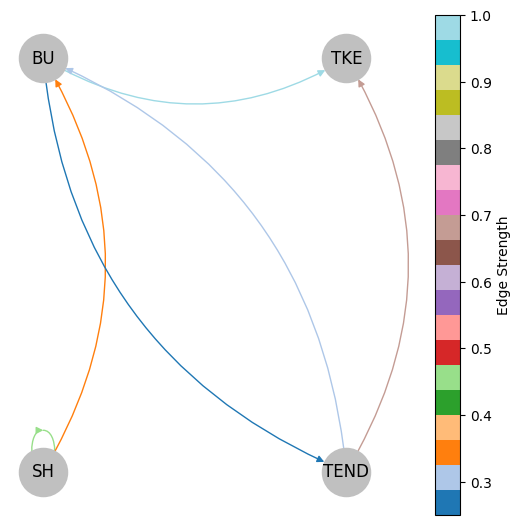

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(5, 5))
nx.draw(G_2d_s1, pos_2d_s1,  edge_cmap= plt.cm.tab20,  #cmap = plt.get_cmap('jet'),
        font_size=12, node_size=1200, node_color='#c0c0c0', #[30,30,30,30,30],
        edge_color=weights_2d_s1, with_labels = True, connectionstyle='arc3, rad = 0.3')
#nx.draw_networkx(G, with_labels = True)
plt.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0.25, 1), cmap=plt.cm.tab20),
              orientation='vertical', label='Edge Strength')
plt.show()

In [ ]:
cdt.metrics.SHD(true_graph, pred_graph_s1)

5.0

In [ ]:
true_values = true_graph
predictions = pred_graph_s1

N = true_values.shape[1]*true_values.shape[0]
accuracy = (true_values == predictions).sum() / N
TP = ((predictions == 1) & (true_values == 1)).sum()
FP = ((predictions == 1) & (true_values == 0)).sum()
TN = ((predictions == 0) & (true_values == 0)).sum()
FN = ((predictions == 0) & (true_values == 1)).sum()
precision = TP / (TP+FP)
recall = TP / (TP + FN)
FDR = FP / (FP + TP)
F1 = 2 * (precision * recall) / (precision + recall)
print('Accuracy: {}, Precision: {}, Recall: {}, FDR: {}, F1 Score: {}'.format(accuracy, precision, recall, FDR,F1))

Accuracy: 0.6875, Precision: 0.3333333333333333, Recall: 0.6666666666666666, FDR: 0.6666666666666666, F1 Score: 0.4444444444444444
